The O/H and Fe/H ratios provide valuable insights into the chemical evolution and star formation history of elliptical galaxies:

## Abundance Patterns

O/H and Fe/H ratios serve as important indicators of the overall metal enrichment in elliptical galaxies[3]. Specifically:

- **O/H ratio**: Oxygen is primarily produced by massive stars that end their lives as Type II supernovae. A high O/H ratio indicates significant early star formation and enrichment from these massive stars[1].

- **Fe/H ratio**: Iron is produced both in Type II supernovae and in Type Ia supernovae, which occur later in a galaxy's evolution. The Fe/H ratio reflects enrichment over longer timescales[1].

## Star Formation History

The comparison between O/H and Fe/H can reveal key aspects of an elliptical galaxy's star formation history:

- **[α/Fe] ratio**: The ratio of α-elements (like oxygen) to iron is a powerful estimator of the duration of star formation in the galaxy[1]. A high [α/Fe] ratio suggests a short, intense period of star formation, while a lower ratio indicates more prolonged star formation[4].

- **Formation scenarios**: These ratios can help distinguish between different formation models for elliptical galaxies, such as monolithic collapse versus hierarchical merging scenarios[2].

## Galactic Properties

O/H and Fe/H ratios also correlate with other important properties of elliptical galaxies:

- **Mass-metallicity relation**: More massive ellipticals tend to have higher overall metallicities, reflected in both O/H and Fe/H ratios[1][2].

- **Radial gradients**: The behavior of O/H and Fe/H ratios as a function of galactic radius can provide insights into the assembly history of the galaxy and processes like gas infall or outflows[5].

## Stellar Populations

These abundance ratios help characterize the stellar populations in elliptical galaxies:

- **Age and metallicity effects**: The combination of O/H and Fe/H information can help break the age-metallicity degeneracy in interpreting galaxy colors and spectra[2].

- **α-enhancement**: Many massive ellipticals show enhanced [α/Fe] ratios, indicating rapid early star formation and providing constraints on galaxy formation models[1][4].

By analyzing O/H and Fe/H ratios, astronomers can gain a deeper understanding of the complex formation and evolution processes that have shaped elliptical galaxies over cosmic time.

Citations:
[1] https://www.aanda.org/articles/aa/full_html/2009/39/aa11269-08/aa11269-08.html
[2] https://academic.oup.com/mnras/article/366/3/717/992390
[3] https://ned.ipac.caltech.edu/level5/Sept04/Henry/Henry1.html
[4] https://www.aanda.org/articles/aa/full_html/2011/06/aa16191-10/aa16191-10.html
[5] https://iopscience.iop.org/article/10.1088/0004-637X/750/1/32
[6] https://academic.oup.com/mnras/article/346/1/135/2891798
[7] https://www.astro.umd.edu/~richard/ASTRO620/A620_Elliptical_Galaxies_2017_lec2.pdf
[8] https://iopscience.iop.org/article/10.1088/0004-637X/776/2/64/pdf

In [1]:
# import the modules
import HR5_cluster as hr5
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

plt.style.use('../paper_style.mplstyle')

/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
# Get all the IDs of clusters present at the given snapshot
snapshot=296

# Let s define the instance of the class Cluster with the snapshot
clus296 = pd.read_csv('../Data/groups5e13.csv')

clus296.HostHaloID

0      1561636
1      1581385
2      1664541
3      1758257
4      1808858
        ...   
169    7265709
170    7265710
171    7265711
172    7265712
173    7265713
Name: HostHaloID, Length: 174, dtype: int64

In [3]:
clusid = 1664541

clus = hr5.Cluster(snapshot,clusid)



In [4]:
galid=1721218
gal = clus.get_alldat_gal(galid)


In [5]:
galmass=[]
for galid in clus.get_galids():
    galtmp=clus.get_alldat_gal(galid)
    # # print(f"{galid} with stellar mass: {galtmp.gal_mstar}")
    galmass.append(galtmp.gal_mstar)

galmass = pd.DataFrame({'ID':clus.get_galids(),'mass':galmass})

In [6]:
# drop row containing 0 for mass
galmass = galmass[galmass['mass']>0]


(array([11.,  1.,  2.,  3.,  3.,  1.,  2.,  0.,  0.,  1.]),
 array([ 9.36916847,  9.59564944,  9.82213041, 10.04861139, 10.27509236,
        10.50157333, 10.7280543 , 10.95453527, 11.18101624, 11.40749721,
        11.63397818]),
 <BarContainer object of 10 artists>)

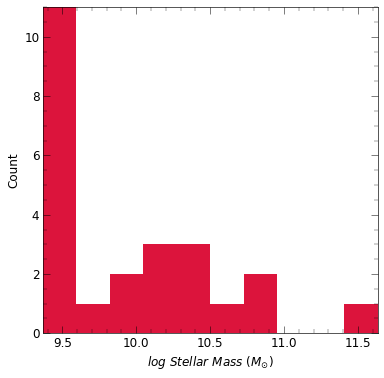

In [7]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'$log \ Stellar \ Mass \ (M_{\odot})$')
ax.set_ylabel(r'Count')
ax.hist(np.log10(galmass['mass']))
#ax.set_xlim()
#ax.set_ylim()

yt : [INFO     ] 2024-08-26 14:01:04,132 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-08-26 14:01:04,133 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2024-08-26 14:01:04,135 Parameters: domain_left_edge          = [-0.2 -0.2 -0.2]
yt : [INFO     ] 2024-08-26 14:01:04,136 Parameters: domain_right_edge         = [0.2 0.2 0.2]
yt : [INFO     ] 2024-08-26 14:01:04,136 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2024-08-26 14:01:04,144 Allocating for 7.327e+04 particles (index particle type 'all')
yt : [INFO     ] 2024-08-26 14:01:04,163 Identified 4.753e+03 octs
yt : [INFO     ] 2024-08-26 14:01:04,582 xlim = -0.200000 0.200000
yt : [INFO     ] 2024-08-26 14:01:04,584 ylim = -0.200000 0.200000
yt : [INFO     ] 2024-08-26 14:01:04,585 xlim = -0.200000 0.200000
yt : [INFO     ] 2024-08-26 14:01:04,586 ylim = -0.200000 0.200000
yt : [INFO     ] 2024-08-26 14:01:04,588 Splatting (('star', 'particle_mass')) onto a 800 by 800 mesh
yt : [I


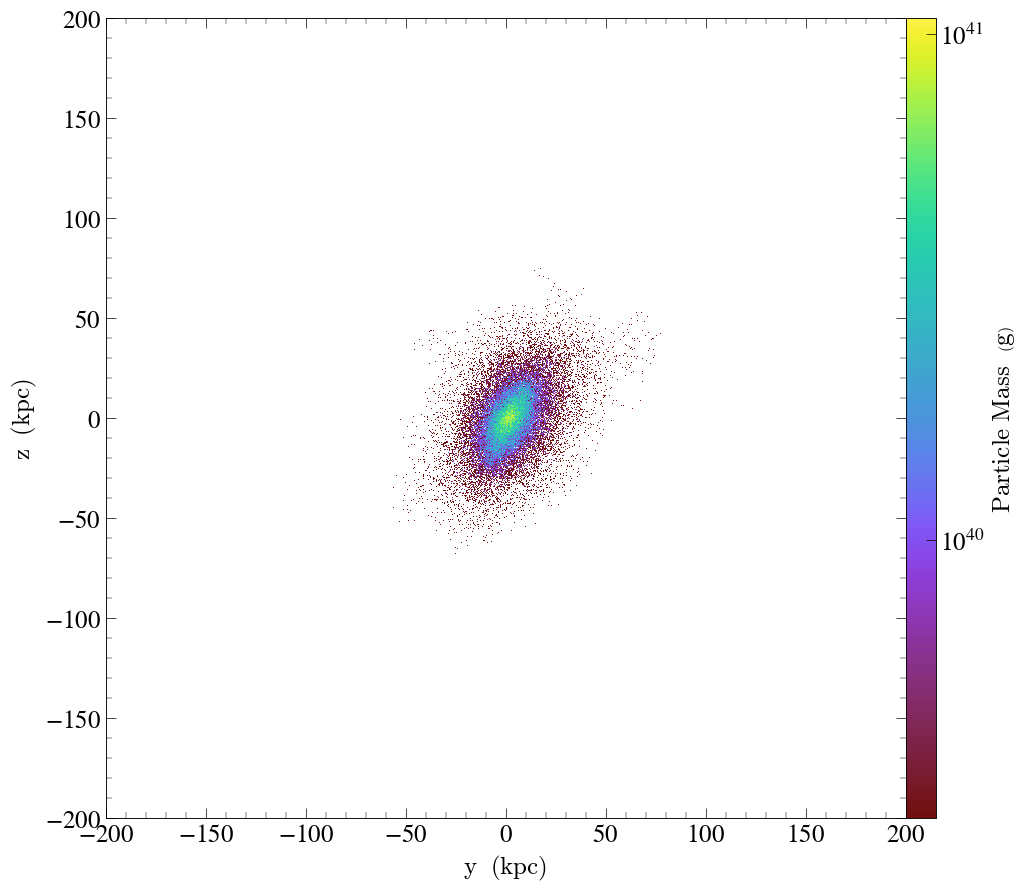

In [8]:
import yt 

galid = 1721222	

# galid = clus.bcgid
galdata = clus.get_alldat_gal(galid)

ds = galdata.get_yt_dataset()


prj = yt.ParticleProjectionPlot(ds,'x',("star","particle_mass"))

# prj.set_unit(("star","particle_mass"), "Msun")
prj.show()


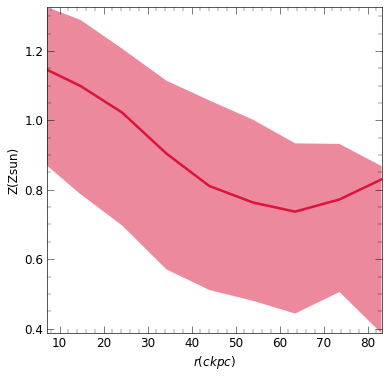

In [9]:
# We can also make simple profile plots of stellar metallicity 
# For example for BCG galaxy of this cluster we show below
import astropy.units as u

def Binned_histogram(data,propx,propy,maxr,binwidth):
    """
    This function returns the binned median and quartiles of the data
    """

    bins = np.arange(0,maxr,binwidth)#pd.cut(data[propx],nb,retbins=True, labels=False,duplicates='drop')
    labels = [int(i) for i in range(len(bins)-1)]
    data['binned'] = pd.cut(data[propx], bins,labels=labels,duplicates='drop')

    Q1 = []
    Q2 = []
    qua1 = []
    qua2 = []

    j=0
    for lab in labels:
        
        Q1.append(data.loc[data['binned']==lab,propx].median())
        Q2.append(data.loc[data['binned']==lab,propy].median())    

        # first and third quartile
        qua1.append(data.loc[data['binned']==lab,propy].quantile(0.25))
        qua2.append(data.loc[data['binned']==lab,propy].quantile(0.75))

        
    return Q1,Q2,qua1,qua2

# get the poisiton in COM frame of BCG galaxy
galdata = clus.get_alldat_gal(galid)
star_pos_gal = galdata.star_pos[:] - galdata.gal_pos
rgal_star = np.linalg.norm(star_pos_gal,axis=1)

# convert rgal_star to kpc
rgal_star = rgal_star*u.Mpc.to(u.kpc)

# Create a dataframe of pandas for analysis
gal_data = pd.DataFrame({'rcom':rgal_star,'star_z':galdata.star_z[:]/0.02})


q1,q2,Q1,Q2 = Binned_histogram(gal_data,'rcom','star_z',100,10)

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.set_xlabel(r'$r(ckpc)$')
ax.set_ylabel(r'Z(Zsun)')
ax.plot(q1,q2)
ax.fill_between(q1,Q1,Q2,alpha=0.5)


In [10]:
ds_all,ds_rest,ds_bcg,ds_icm = clus.save_yt_dataset(clus.clusID)


yt : [INFO     ] 2024-08-26 14:01:11,202 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-08-26 14:01:11,204 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2024-08-26 14:01:11,205 Parameters: domain_left_edge          = [-2. -2. -2.]
yt : [INFO     ] 2024-08-26 14:01:11,206 Parameters: domain_right_edge         = [2. 2. 2.]
yt : [INFO     ] 2024-08-26 14:01:11,208 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2024-08-26 14:01:11,213 Allocating for 3.110e+06 particles (index particle type 'all')
yt : [INFO     ] 2024-08-26 14:01:12,269 Identified 2.108e+05 octs
yt : [INFO     ] 2024-08-26 14:01:12,810 xlim = -2.000000 2.000000
yt : [INFO     ] 2024-08-26 14:01:12,811 ylim = -2.000000 2.000000
yt : [INFO     ] 2024-08-26 14:01:12,812 xlim = -2.000000 2.000000
yt : [INFO     ] 2024-08-26 14:01:12,813 ylim = -2.000000 2.000000
yt : [INFO     ] 2024-08-26 14:01:12,814 Splatting (('star', 'particle_mass')) onto a 800 by 800 mesh
yt : [INFO   

### Cluster COM

In [12]:

alldat = clus.get_alldat_gal(clus.get_galids())

allpos = []
allmass = []
for gal_obj in alldat:

    allpos.append(gal_obj.dm_pos[:])
    allmass.append(gal_obj.dm_mass[:])
    allpos.append(gal_obj.star_pos[:])
    allmass.append(gal_obj.star_mass[:])
    allpos.append(gal_obj.gas_pos[:])
    allmass.append(gal_obj.gas_mass[:])
    
# combine list of arays
all_pos = np.concatenate(allpos,axis=0)
all_mass = np.concatenate(allmass,axis=0)

# calculate center of mass by using all_mass and all_pos

cluster_com = np.average(all_pos,weights=all_mass,axis=0)

cluster_com

array([841.79108936, 510.88219046, 487.11958497])

In [ ]:
bcg = clus.get_alldat_gal(clus.bcgid)

(bcg.gal_pos - bcg.clus_pos)*1000

array([ 7.60622897,  9.86374599, 11.91812827])

In [ ]:
np.linalg.norm(bcg.gal_pos - bcg.clus_pos)*1000

17.239199095343242

### BCG COM

In [ ]:
allpos = []
allmass = []
# allpos.append(bcg.dm_pos[:])
# allmass.append(bcg.dm_mass[:])
# allpos.append(bcg.star_pos[:])
# allmass.append(bcg.star_mass[:])
allpos.append(bcg.gas_pos[:])
allmass.append(bcg.gas_mass[:])

all_pos = np.concatenate(allpos,axis=0)
all_mass = np.concatenate(allmass,axis=0)

bcg_pos= np.median(all_pos,weights=all_mass,axis=0)

In [ ]:
np.linalg.norm(bcg_pos - bcg.clus_pos)*1000

37.271862613449734

yt : [INFO     ] 2024-08-26 18:28:05,140 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-08-26 18:28:05,141 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2024-08-26 18:28:05,142 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2024-08-26 18:28:05,142 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-08-26 18:28:05,143 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2024-08-26 18:28:05,148 Allocating for 2.584e+06 particles (index particle type 'all')
yt : [INFO     ] 2024-08-26 18:28:05,329 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-08-26 18:28:05,330 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2024-08-26 18:28:05,331 Parameters: domain_left_edge          = [-1.2 -1.2 -1.2]
yt : [INFO     ] 2024-08-26 18:28:05,332 Parameters: domain_right_edge         = [1.2 1.2 1.2]
yt : [INFO     ] 2024-08-26 18:28:05,332 Parameters: cosmological_simulation   = 0.


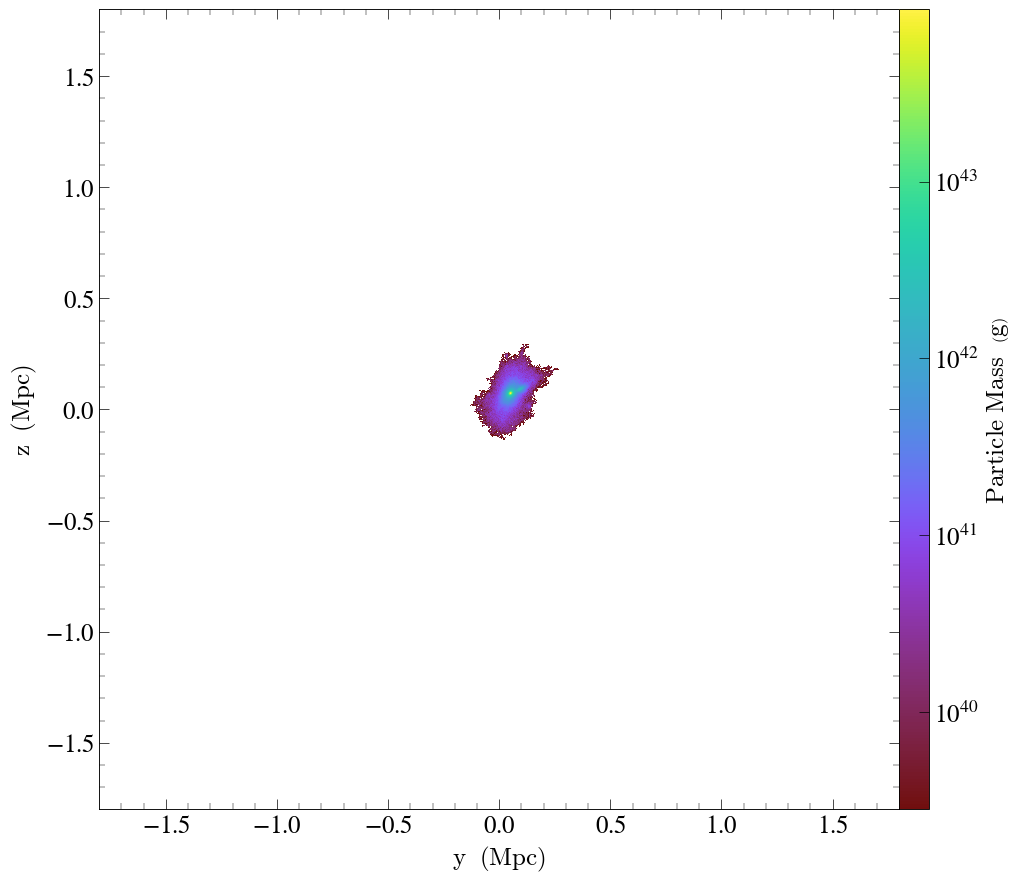

In [5]:
# import the modules
import HR5_cluster as hr5
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import yt 

plt.style.use('../paper_style.mplstyle')

clusid = 1664541
snapshot = 296
clus = hr5.Cluster(snapshot,clusid)

bcg = clus.get_alldat_gal(clus.bcgid)

ds = bcg.get_yt_dataset()

yt.ParticleProjectionPlot(ds,'x',("star","particle_mass"))

In [ ]:


# We can also make simple profile plots of stellar metallicity 
# For example for BCG galaxy of this cluster we show below
import astropy.units as u





-0.2202518604475358 -0.0732362939151997


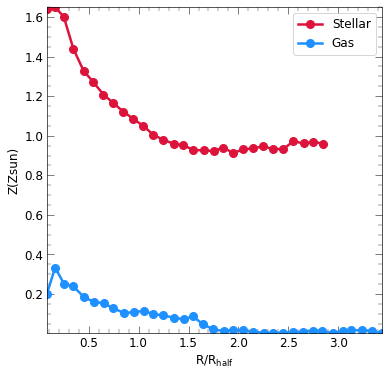

In [14]:
# import the modules
import HR5_cluster as hr5
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats

plt.style.use('../paper_style.mplstyle')

clusid = 1664541
snapshot = 296
clus = hr5.Cluster(snapshot,clusid)

# galid = 1721222	
galid = clus.bcgid
gal = clus.get_alldat_gal(galid)

R_s,Z_s,slope_s,std_e_s = gal.get_metal_slope(r_rhalf_max=3,r_bin_width=0.1,var='star')

R_g,Z_g,slope_g,std_e_g = gal.get_metal_slope(r_rhalf_max=4,r_bin_width=0.1,var='gas')

# fit a line and get the slope

# # Fit a line to the data using scipy's linregress
# slope, intercept, r_value, p_value, std_err = stats.linregress(R, Z)

# # Print the results
# print(f"Slope: {slope}")
# print(f"Intercept: {intercept}")
# print(f"R-squared: {r_value**2}")
print(slope_s,slope_g)

fig,ax = plt.subplots(1,1,figsize=(6,6))
ax.set_xlabel(r'$\mathrm{R/R_{\mathrm{half}}}$')
ax.set_ylabel(r'Z(Zsun)')

ax.plot(R_s,Z_s,marker='o',markersize=8,label='Stellar')
ax.plot(R_g,Z_g,marker='o',markersize=8,label='Gas')

ax.legend()

plt.show()

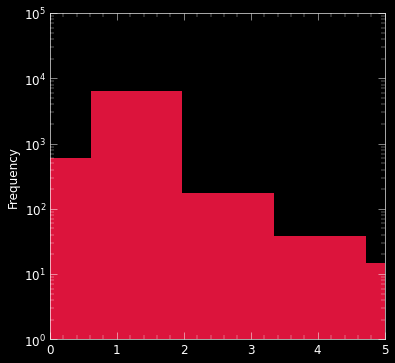

In [ ]:
morpho = pd.read_csv('../Data/morphology.csv')


fig,ax = plt.subplots(1,1,figsize=(6,6))
morpho.sersicn.plot(ax=ax,kind='hist',bins=50,xlim=(0,5))

ax.set_yscale('log')
ax.set_ylim(1,1e5)
plt.show()

## Projection Plot


filling BCG data
filling ICM data
filling Rest data
filling All data
BCG has (565964,) particles
ICM has (417259,) particles
Rest has (1652159,) particles
All has (2635382,) particles
[2, 4, 1, 2]


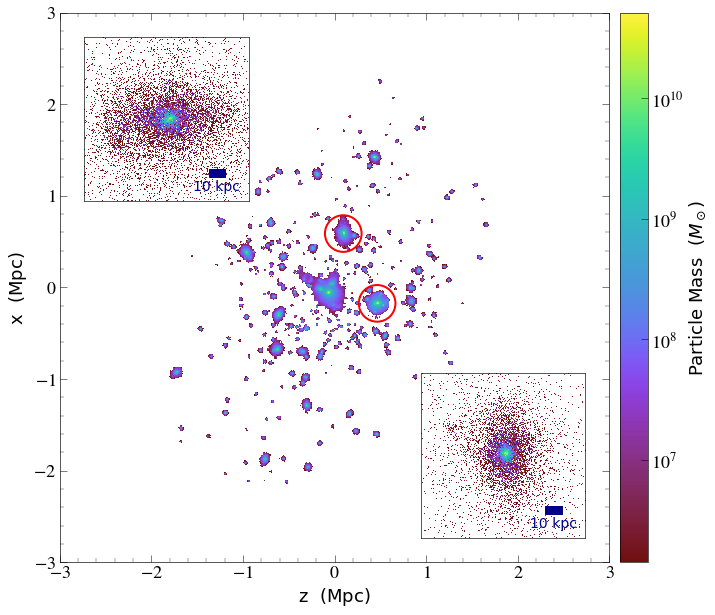

In [5]:
import yt
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
# import the modules
import HR5_cluster as hr5
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('../paper_style.mplstyle')

def ProjectionPlot(ds,center_list,field,ds_bcg):
    

        p = yt.ParticleProjectionPlot(ds,'y',field,width=(6,'Mpc'))
       
        p.set_unit(('star', 'particle_mass'),'Msun')
        
        for center1 in center_list:
                p.annotate_sphere(center1, 0.2, circle_args={'color': 'red', 'linewidth': 2})

        plot = p.plots[field]
        plot.figure = fig
        plot.axes = grid[0].axes

       
        plot.cax = grid.cbar_axes[0]
        
        


        p._setup_plots()
      
        loc=[2,4,1,2]
        print(loc)
        for i,center1 in enumerate(center_list):

                p1 = yt.ParticleProjectionPlot(ds,'y',field,center=center1, width=(100,'kpc'))
        
                p1.set_unit(field,'Msun')
        
                
                axins = inset_axes(plot.axes, width="30%", height="30%", loc=loc[i], borderpad=2)
                
               
                
                # axins.plot(np.arange(-50,50),np.arange(-50,50),color='red',linewidth=2)

                plot1 = p1.plots[field]
                plot1.axes = axins

                
                # plot1.cax = grid.cbar_axes[0]

                p1._setup_plots()

                # Add a scale bar to the inset
                scalebar = AnchoredSizeBar(axins.transData,
                           label=f'{10} kpc',  # Label for the scale bar
                           loc='lower right',  # Location of the scale bar
                           pad=0.5,
                           color='darkblue',
                           frameon=False,
                           size=10,  # Thickness of the scale bar
                           size_vertical=5,
                           fontproperties=fm.FontProperties(size=14))

                axins.add_artist(scalebar)

                # hide label
                axins.xaxis.label.set_visible(False)
                axins.yaxis.label.set_visible(False)
                # hide ticks
                axins.set_xticks([])
                axins.set_yticks([])

        
        projbcg = yt.ParticleProjectionPlot(ds_bcg,'y',field)

        projbcg.set_unit(field,'Msun')
        
        bcg_dat = projbcg.frb[field]
        bcg_dat_array = bcg_dat.to_ndarray()
        extent = [-3,3,-3,3]
        grid[0].axes.imshow(np.log10(bcg_dat_array), origin='lower', cmap='arbre',extent=extent)

        p._setup_plots()

        fig.savefig(f'../Plots/{clusid}.png',bbox_inches='tight')
        fig.savefig(f'../Plots_pres/{clusid}.png',bbox_inches='tight',transparent=True)
        fig.savefig(f'../Plots/{clusid}.pdf',bbox_inches='tight')


clusid = 7265713
snapshot = 296
clus = hr5.Cluster(snapshot,clusid)

ds_all,ds_rest,ds_bcg,ds_icm = clus.save_yt_dataset()


fig = plt.figure(1,figsize=(16,16))

grid = AxesGrid(fig, (0.085,0.085,0.83,0.83),
                nrows_ncols = (1, 1),
                axes_pad = 0.5,
                label_mode = "L",
                share_all = True,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="5%",
                cbar_pad="2%")

center = [[-0.17409756  ,0.14532349  ,0.46427775],[ 0.58761546, -0.12109456  ,0.09481522]]
ProjectionPlot(ds_rest,center,('star','particle_mass'),ds_bcg)




## Z_star, Z_gas , Fe/H analysis

/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]
100%|██████████| 134/134 [00:00<00:00, 1370.02it/s]


supplied axes, not saving


100%|██████████| 134/134 [00:00<00:00, 403.93it/s]


supplied axes, not saving


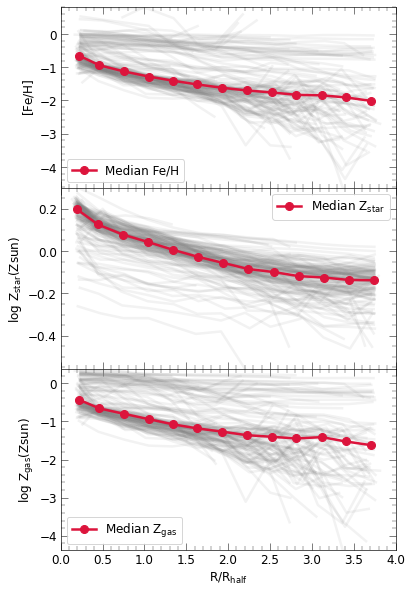

In [1]:
import pandas as pd
import HR5_cluster as hr5
import configparser
parser = configparser.ConfigParser()
parser.read('../params.ini')

outdir = parser.get('Paths','outdir')
galcats = parser.get('Paths','galaxycats')
morphs = parser.get('Paths','morphs')
snapdir = parser.get('Paths','snapfiles')

snap = 296


# get only elliptical galaxies
snapm = str(snap).zfill(3)
# get only elliptical galaxies
morpho = pd.read_csv(f'{morphs}/morphology_{snapm}.csv')

e_galaxies = morpho[morpho['sersicn']>2.5]

import matplotlib.pyplot as plt

fig,ax = plt.subplots(3,1,figsize=(6,10),sharex=True)


# clusid = 1664541

Ana = hr5.Analysis(snap)

Ana.get_slope_data(galids=e_galaxies.ID,clusids=e_galaxies.clusID,rmax=4,rbin_width=0.3,var='feh',dump_data=True,use_cache=False)
Ana.plot_gradient('feh',save=True,axes=ax[0],plot_gal=True)



Ana.get_slope_data(galids=e_galaxies.ID,clusids=e_galaxies.clusID,rmax=4,rbin_width=0.3,var='met',dump_data=True,use_cache=False)
Ana.plot_gradient('met',save=True,axes=ax[1:],plot_gal=True)

fig.subplots_adjust(hspace=0)

fig.savefig(f'../Plots/metal_distribution_{snap}.png',bbox_inches='tight')
fig.savefig(f'../Plots_pres/metal_distribution_{snap}.png',transparent=True,bbox_inches='tight')

## Distribution with redshift

/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]
100%|██████████| 7/7 [00:00<00:00, 20.89it/s]


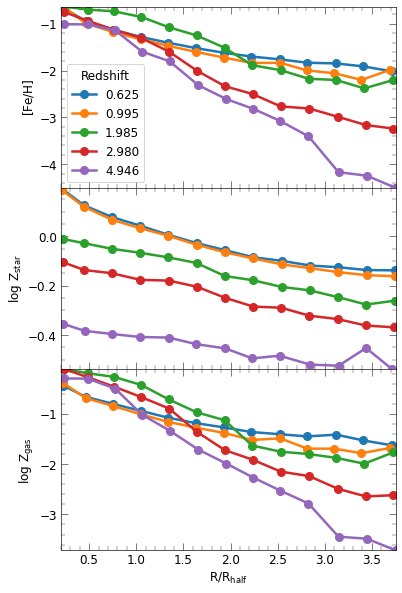

In [1]:
import pandas as pd
import HR5_cluster as hr5
import os 
import matplotlib.pyplot as plt
plt.style.use('../paper_style.mplstyle')
import numpy as np
import configparser
# load up the parameter file
parser = configparser.ConfigParser()
parser.read('../params.ini')

outdir = parser.get('Paths','outdir')
galcats = parser.get('Paths','galaxycats')
morphs = parser.get('Paths','morphs')
snapdir = parser.get('Paths','snapfiles')
# get snaps
snaps = [ int(os.path.splitext(file)[0]) for file in os.listdir(snapdir)if  int(os.path.splitext(file)[0])>50]

fig,ax = plt.subplots(3,1,figsize=(6,10),sharex=True)

vars = {'feh':r'$\rm [Fe/H]$','Zs':r'$\rm Z_{\rm star}$','Zg':r'$\rm Z_{\rm gas}$'}

# define three distinct colors for four curves
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

 # get snapshot data
time_df = pd.read_csv('../Data/Time_data.csv')
time_df.columns = ['snapshot','redshift','LBT','dx']
time_df.set_index('snapshot',inplace=True)

# redshift you are interested in
redshifts = [0.625,1,2,3,5]

# get values of snapshots near these redshift
snaps= [(time_df['redshift']-red).abs().idxmin()for red in redshifts]

redshifts = time_df.loc[snaps]['redshift'].tolist()


for i,var in enumerate(vars.keys()):
    
    if var in ['Zs','Zg']:
            vari='met'
    else:
            vari='feh'

    for j,snap in enumerate(snaps):#sorted(snaps):
        out = f'{outdir}/Slope_{snap}.json'

        snapm = str(snap).zfill(3)
        # get only elliptical galaxies
        morpho = pd.read_csv(f'{morphs}/morphology_{snapm}.csv')

        e_galaxies = morpho[morpho['sersicn']>2.5]

        red = redshifts[j]

        Ana = hr5.Analysis(snap)

        # chech if the json file exists
        if not os.path.exists(f'{outdir}/Gradient_{vari}_{snap}.json'):
                Ana.get_slope_data(galids=e_galaxies.ID,clusids=e_galaxies.clusID,rmax=4,rbin_width=0.3,var=f'{vari}',dump_data=True,use_cache=False)
        else:
               Ana.get_slope_data(galids=e_galaxies.ID,clusids=e_galaxies.clusID,rmax=4,rbin_width=0.3,var=f'{vari}',dump_data=False,use_cache=True)
        
        if var in ['Zg','feh']:
            grad = getattr(Ana, f'median_gradient_{vari}')
            
            if var=='Zg':
                ax[i].plot(grad['median_Rg'],np.log10(grad[f'median_{var}']),marker='o',markersize=8,label=f'{red:0.3f}',color=colors[j])

                ax[i].set_ylabel(f'log {vars[var]}')

            else:
                ax[i].plot(grad['median_Rg'],grad[f'median_{var}'],marker='o',markersize=8,label=f'{red:0.3f}',color=colors[j])
                
                ax[i].set_ylabel(f'{vars[var]}')

            ax[i].set_xlabel(r'$\mathrm{R/R_{\mathrm{half}}}$')
            
        
        else:
            grad = getattr(Ana, f'median_gradient_{vari}')

            ax[i].plot(grad['median_Rs'],np.log10(grad[f'median_{var}']),marker='o',markersize=8,label=f'{red:0.3f}',color=colors[j])

            ax[i].set_xlabel(r'$\mathrm{R/R_{\mathrm{half}}}$')
            ax[i].set_ylabel(f'log {vars[var]}')


ax[0].legend(loc=3,title='Redshift')      
fig.subplots_adjust(hspace=0)
fig.savefig('../Plots/metal_evolution_redshift.png',bbox_inches='tight')      
fig.savefig('../Plots_pres/metal_evolution_redshift.png',bbox_inches='tight',transparent=True)      


    


## Slope analysis

- run morphology_calculator.py
- run slope_calculator.py 

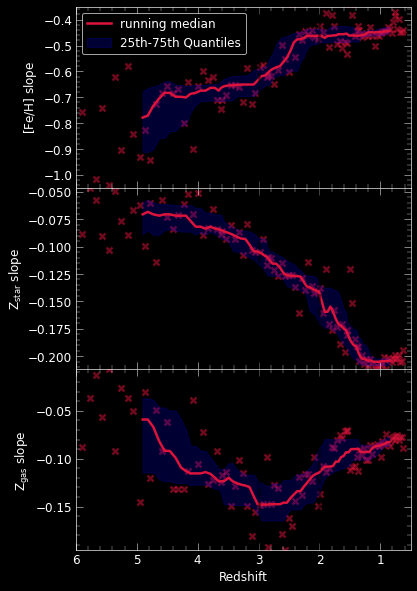

In [1]:
import pandas as pd
import configparser
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('../paper_style.mplstyle')

# load up the parameter file
parser = configparser.ConfigParser()
parser.read('../params.ini')

outdir = parser.get('Paths','outdir')
galcats = parser.get('Paths','galaxycats')
morphs = parser.get('Paths','morphs')
snapdir = parser.get('Paths','snapfiles')


slope_z = pd.read_csv(f'{outdir}/slope_redshift.csv')

slope_z.sort_values('redshift',inplace=True)
# get running dataframe
running_df = slope_z.rolling(20,center=True).median()
# Calculate rolling 25th and 75th percentiles (quantiles)

fig,ax = plt.subplots(3,1,figsize=(6,10),sharex=True)

vars = {'feh':r'$\rm [Fe/H]$','Zs':r'$\rm Z_{\rm star}$','Zg':r'$\rm Z_{\rm gas}$'}

for i,var in enumerate(vars.keys()):

    running_df['quantile_25'] = slope_z[f'slope_{var}'].rolling(window=20, center=True).quantile(0.25)
    running_df['quantile_75'] = slope_z[f'slope_{var}'].rolling(window=20, center=True).quantile(0.75)


    
    ax[i].set_ylabel(f'{vars[var]} slope')

    ax[i].scatter(slope_z['redshift'],slope_z[f'slope_{var}'],alpha=0.5,marker='x')

    ax[i].plot(running_df['redshift'],running_df[f'slope_{var}'],label='running median')
    ax[i].fill_between(running_df['redshift'], running_df['quantile_25'], running_df['quantile_75'], color='blue', alpha=0.2, label='25th-75th Quantiles')


    ax[i].invert_xaxis()
    ax[i].set_xlim(6,0.5)

    ax[i].axvline(3,linestyle='--',color='k',alpha=0.5)
    ax[i].axvline(2,linestyle='--',color='k',alpha=0.5)
    # ax[i].set_ylim(-1,-0.3)
    
    # ax[i].set_title(f'{var} slope evolution')

    fig.subplots_adjust(hspace=0)

ax[0].set_ylim(-1.05,-0.35)
ax[2].set_xlabel(r'Redshift')
ax[0].legend()
fig.savefig('../Plots/slope_evolution.png',bbox_inches='tight')
fig.savefig('../Plots/slope_evolution.pdf')
fig.savefig('../Plots_pres/slope_evolution.png',bbox_inches='tight',transparent=True)



## Distribution with mass

/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]
100%|██████████| 93/93 [01:20<00:00,  1.15it/s]


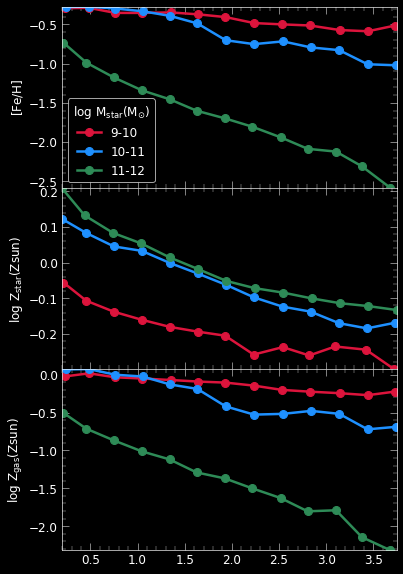

In [2]:
import pandas as pd
import HR5_cluster as hr5
import configparser
parser = configparser.ConfigParser()
import matplotlib.pyplot as plt
import numpy as np

parser.read('../params.ini')


plt.style.use('../paper_style.mplstyle')

outdir = parser.get('Paths','outdir')
galcats = parser.get('Paths','galaxycats')
morphs = parser.get('Paths','morphs')
snapdir = parser.get('Paths','snapfiles')


snap=296

# get only elliptical galaxies
snapm = str(snap).zfill(3)
# get only elliptical galaxies
morpho = pd.read_csv(f'{morphs}/morphology_{snapm}.csv')

e_galaxies = morpho[morpho['sersicn']>2.5]
e_galaxies.set_index('ID',inplace=True)
# read snapshot data 
snap296 = pd.read_parquet(f'{galcats}/galaxy_catalogue_{snapm}.parquet')
snap296.set_index('ID',inplace=True)

# get the variabels in e_galaxies that are in snap296
e_galaxies = e_galaxies.join(snap296,how='left')

mcuts = [1.0e9,1.0e10,1.0e11,1.0e12]
labels=['9-10','10-11','11-12']
e_galaxies['Mcut_value'] = pd.cut(e_galaxies['Mstar(Msun)'],bins=mcuts,labels=mcuts[:-1])

grouped = e_galaxies.groupby('Mcut_value')
# iterate over groups
fig,ax = plt.subplots(3,1,figsize=(6,10),sharex=True)
i=0
for bin_label, group in grouped:
    label = np.log10(bin_label)

    Ana = hr5.Analysis(snap)
    Ana.get_slope_data(galids=group.index,clusids=group.clusID,rmax=4,rbin_width=0.3,var='feh',dump_data=False,use_cache=False)

    ax[0].plot(Ana.median_gradient_feh.median_Rg,Ana.median_gradient_feh.median_feh,marker='o',markersize=8,label=labels[i])

    Ana.get_slope_data(galids=group.index,clusids=group.clusID,rmax=4,rbin_width=0.3,var='met',dump_data=False,use_cache=False)

    ax[1].plot(Ana.median_gradient_met.median_Rs,np.log10(Ana.median_gradient_met.median_Zs),marker='o',markersize=8)

                    
    ax[2].plot(Ana.median_gradient_met.median_Rg,np.log10(Ana.median_gradient_met.median_Zg),marker='o',markersize=8)

    i+=1

ax[0].legend(loc=3,title=r'$\rm log \ M_{star}(M_{\odot})$')
ax[0].set_ylabel(r'$\mathrm{[Fe/H]}$')
ax[1].set_xlabel(r'$\mathrm{R/R_{\mathrm{half}}}$')
ax[1].set_ylabel(r'$\mathrm{log \ Z_{star}(Zsun)}$')
ax[2].set_ylabel(r'$\mathrm{log \ Z_{gas}(Zsun)}$')

fig.subplots_adjust(hspace=0)

fig.savefig('../Plots/metal_distribution_mass.png',bbox_inches='tight')
fig.savefig('../Plots_pres/metal_distribution_mass.png',bbox_inches='tight',transparent=True)



/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


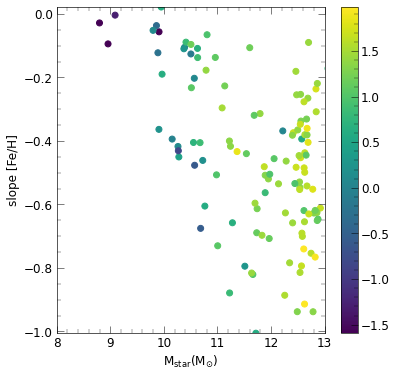

In [2]:
import pandas as pd
import HR5_cluster as hr5
import configparser
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('../paper_style.mplstyle')

# load up the parameter file
parser = configparser.ConfigParser()
parser.read('../params.ini')

outdir = parser.get('Paths','outdir')
galcats = parser.get('Paths','galaxycats')
morphs = parser.get('Paths','morphs')
snapdir = parser.get('Paths','snapfiles')


# get files in snapfiles directory
snap = 296

morpho = pd.read_csv(f'{morphs}/morphology_{snap}.csv')
e_galaxies = morpho[morpho['sersicn']>2.5]
e_galaxies.set_index('ID',inplace=True)
# read snapshot data 
snap296 = pd.read_parquet(f'{galcats}/galaxy_catalogue_{snap}.parquet')
snap296.set_index('ID',inplace=True)

# get the variabels in e_galaxies that are in snap296
e_galaxies = e_galaxies.join(snap296,how='left')

# clusid = 1664541
Ana = hr5.Analysis(snap)
Ana.get_slope_data(galids=e_galaxies.index,clusids=e_galaxies.clusID,rmax=4,rbin_width=0.3,var='feh',dump_data=False,use_cache=True)
slope_df = Ana.slope_df.copy()

e_galaxies.drop('clusID',axis=1,inplace=True)

slope_df.set_index('ID',inplace=True)

slope_df = slope_df.join(e_galaxies,how='left')

fig,ax = plt.subplots(1,1)
ax.set_xlabel(r'$\rm M_{star} (M_{\odot})$')   
ax.set_ylabel(r'slope [Fe/H]')
cb = ax.scatter(np.log10(slope_df['Mgas(Msun)']),slope_df['slope_feh'],marker='o',c=np.log10(slope_df['SFR_100Myr']))
ax.set_xlim(8,13)
fig.colorbar(cb)


In [9]:
snap='051'
morpho = pd.read_csv(f'{morphs}/morphology_{snap}.csv')
e_galaxies = morpho[morpho['sersicn']>2.5]
e_galaxies

,clusID,sersicn,ID
17,1038674,2.568,1054216
23,1200185,3.305,1218462
32,1491429,2.570,1514494
61,2697380,6.676,2740739


In [24]:

slope_z = pd.read_csv(f'{outdir}/slope_redshift.csv')

slope_z.sort_values('redshift',inplace=True)

slope_z

,slope_feh,slope_Zs,slope_Zg,redshift,LBT,dx
46,-0.4387,-0.19420,-0.088750,0.625361,6.004000,1.230501
45,-0.4473,-0.20420,-0.076970,0.645668,6.129012,1.215317
44,-0.4460,-0.20500,-0.077000,0.672860,6.291831,1.195562
43,-0.3967,-0.19930,-0.080100,0.700456,6.451776,1.176160
42,-0.4348,-0.20140,-0.075700,0.728226,6.607541,1.157261
...,...,...,...,...,...,...
51,-1.0380,-0.10330,-0.006480,5.464131,12.724909,1.237604
50,-0.7417,-0.08997,-0.056520,5.571501,12.750640,1.217383
49,-1.0160,-0.05713,-0.012955,5.676952,12.774915,1.198157
48,-1.4790,-0.04650,-0.036620,5.761454,12.793696,1.183182


 50%|█████     | 37/74 [00:09<00:08,  4.33it/s]/home/ankitsingh/github_copy/hr5_metallicity/Code/HR5_cluster.py:1101: RuntimeWarning: divide by zero encountered in true_divide
  ofe = gal.gas_o[:]/gal.gas_fe[:]
/home/ankitsingh/github_copy/hr5_metallicity/Code/HR5_cluster.py:1101: RuntimeWarning: invalid value encountered in true_divide
  ofe = gal.gas_o[:]/gal.gas_fe[:]
100%|██████████| 7/7 [00:01<00:00,  4.75it/s]


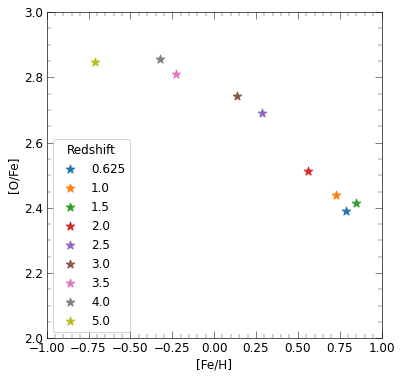

In [12]:
import pandas as pd
import HR5_cluster as hr5
import os 
import matplotlib.pyplot as plt
plt.style.use('../paper_style.mplstyle')
import numpy as np
import configparser
# load up the parameter file
parser = configparser.ConfigParser()
parser.read('../params.ini')

outdir = parser.get('Paths','outdir')
galcats = parser.get('Paths','galaxycats')
morphs = parser.get('Paths','morphs')
snapdir = parser.get('Paths','snapfiles')

snap=296

morpho = pd.read_csv(f'{morphs}/morphology_{snap}.csv')
e_galaxies = morpho[morpho['sersicn']>2.5]
e_galaxies.set_index('ID',inplace=True)
# read snapshot data 
snap296 = pd.read_parquet(f'{galcats}/galaxy_catalogue_{snap}.parquet')
snap296.set_index('ID',inplace=True)

# get the variabels in e_galaxies that are in snap296
e_galaxies = e_galaxies.join(snap296,how='left')

 # get snapshot data
time_df = pd.read_csv('../Data/Time_data.csv')
time_df.columns = ['snapshot','redshift','LBT','dx']
time_df.set_index('snapshot',inplace=True)



vars = {'feh':r'$\rm [Fe/H]$','Zs':r'$\rm Z_{\rm star}$','Zg':r'$\rm Z_{\rm gas}$'}

# define three distinct colors for four curves
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


redshifts = [0.625,1,1.5,2,2.5,3,3.5,4,5]

snaps= [(time_df['redshift']-red).abs().idxmin()for red in redshifts]

fig,ax = plt.subplots(1,1)

data_plot=[]
for j,snap in enumerate(snaps):#sorted(snaps):
        out = f'{outdir}/Slope_{snap}.json'

        snapm = str(snap).zfill(3)
        # get only elliptical galaxies
        morpho = pd.read_csv(f'{morphs}/morphology_{snapm}.csv')

        e_galaxies = morpho[morpho['sersicn']>2.5]
        e_galaxies.set_index('ID',inplace=True)
        red = redshifts[j]

        Ana = hr5.Analysis(snap)

        all_data = Ana.get_variable_allgal(galids=e_galaxies.index,clusids=e_galaxies.clusID)
        
        data_plot.append({'mean_feh':np.mean(all_data['mean_feh']),'mean_ofe':np.mean(all_data['mean_ofe']),'redshift':redshifts[j]})


data_plot = pd.DataFrame(data_plot)   

for i,red in enumerate(data_plot['redshift']):
                
        ax.scatter(data_plot['mean_feh'].iloc[i],data_plot['mean_ofe'].iloc[i],c = colors[i],s=80,marker='*',label=f'{red}')



ax.set_xlabel(r'[Fe/H]')
ax.set_ylabel(r'[O/Fe]')
ax.legend(title='Redshift')
ax.set_xlim(-1,1)
ax.set_ylim(2,3)
fig.savefig('../Plots/OFe_vs_Fe_evolution.png',bbox_inches='tight')
fig.savefig('../Plots_pres/OFe_vs_Fe_evolution.png',bbox_inches='tight',transparent=True)

In [2]:
data_plot

,mean_feh,mean_ofe,redshift
0,0.787481,2.389675,0.625
1,0.730722,2.438830,1.000
2,0.560932,2.512762,2.000
3,0.138705,2.743715,3.000
4,-0.714180,2.847303,5.000


In [ ]:
from scipy.io import FortranFile
import yt_cosmo
from yt.analysis_modules.star_analysis.api import StarFormationRate


def get_dt():
    info={}
    with open('/ramses/jaehyun/HR5/data/02_without_dc/output_00296/info_00296.txt') as f:
        for l,txt in enumerate(f):
            if l<=5:
                lab = txt.split('=')[0].rstrip()
                #print(int(txt.split('=')[1].split('\n')[0]))
                info[lab] = int(txt.split('=')[1].split('\n')[0])
                
            if (l>6)&(l<18):
                lab = txt.split('=')[0].rstrip()
                #print(float(txt.split('=')[1].split('\n')[0]))
                info[lab] = float(txt.split('=')[1].split('\n')[0])

    info['scale_m']    = info['unit_d']*(info['unit_l'])**3


    f = FortranFile(f'/ramses/jaehyun/HR5/data/02_without_dc/output_00296/amr_00296.out00001', 'r' )

    ncpu = f.read_ints( dtype='i4')
    ndim = f.read_ints( dtype='i4')
    nx,ny,nz = f.read_ints( dtype='i4')
    nlevelmax = f.read_ints( dtype='i4')
    ngridmax = f.read_ints( dtype='i4')
    nboundary = f.read_ints( dtype='i4')
    ngrid_current = f.read_ints( dtype='i4')
    boxlen = f.read_reals( dtype='float')

    noutput,iout,ifout = f.read_ints( dtype='i4')
    tout = f.read_reals( dtype='float')
    aout = f.read_reals( dtype='float')
    t = f.read_reals( dtype='float')
    dtold = f.read_reals( dtype='float')
    dtnew = f.read_reals( dtype='float')
    nstep,nstep_coarse = f.read_ints( dtype='i4')
    print(nstep,nstep_coarse)

    f.close()
    
    return info,dtnew 

info,dt_new = get_dt()


def sfr(ds,ad):

    
    red = ds.current_redshift
    simtime = yt_cosmo.t_from_z(red).in_units('Gyr').value

    v, center = ds.find_max("density")
    sp = ds.sphere(center, (50, "kpc"))

    # This puts the particle data for *all* the particles in the sphere sp
    # into the arrays sm and ct.

    simtime = yt_cosmo.t_from_z(ds.current_redshift).in_units('Gyr').value
    formation_time = simtime - ad[('star','age')].in_units('Gyr').value
    age = ad[('star','age')].in_units('Gyr').value

    mass = ad[("star", "particle_mass")].in_units('Msun')
    age = np.array(age)*1000 #sp[("stars", "age")].in_units('Myr')
    ct = yt_cosmo.t_from_z(ds.current_redshift).in_units('Myr') - ad[("star", "age")].in_units('Myr')

    # Pick out only old stars using Numpy array fancy indexing.
    threshold = ds.quan(100.0, "Myr")
    mass_old = mass[age > threshold]
    ct_old = ct[age > threshold]

    sfr = StarFormationRate(ds, star_mass=mass_old, star_creation_time=ct_old,
                            volume=ad.volume())

    return sfr 



